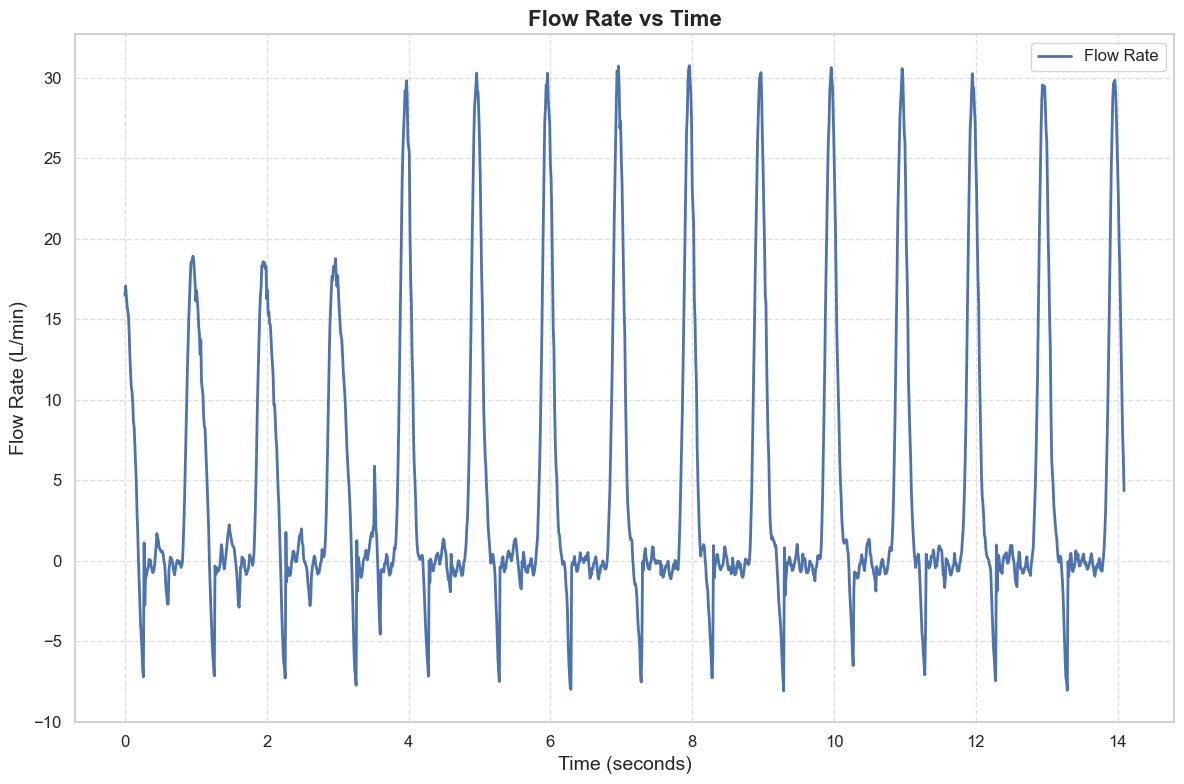

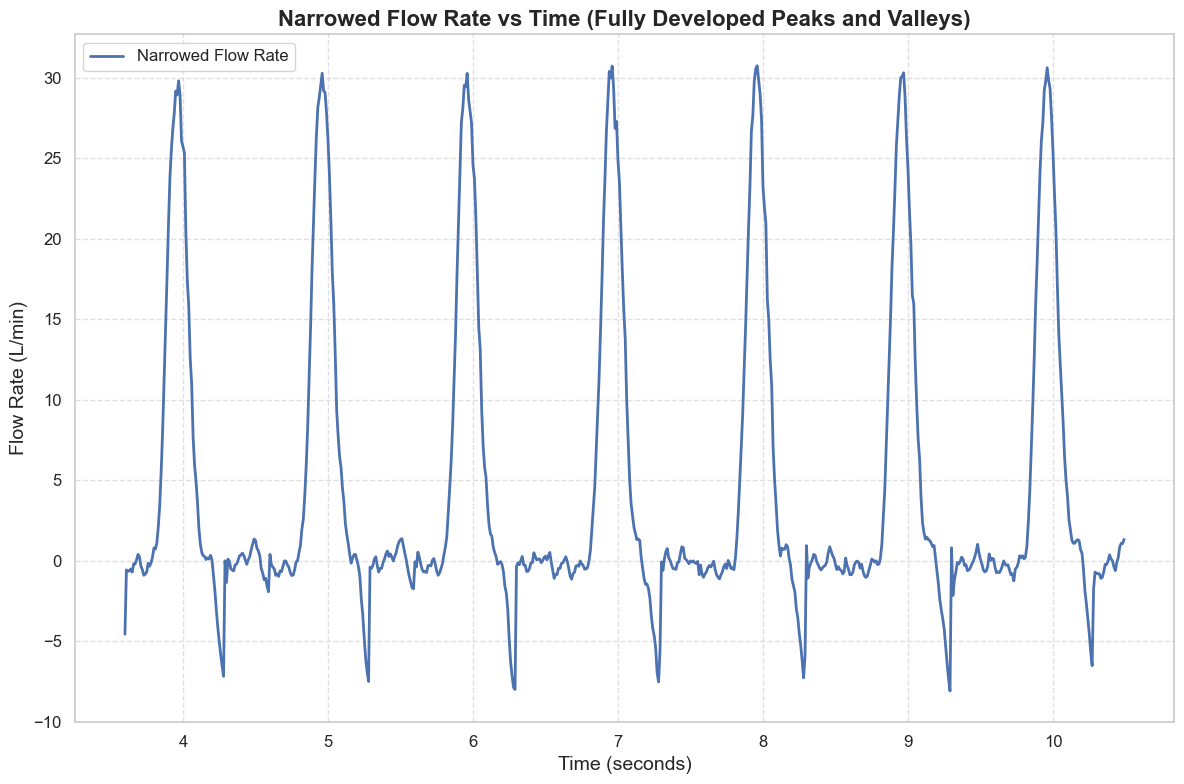

|   Time (seconds) |   Flow Rate (L/min) |
|-----------------:|--------------------:|
|             6.55 |          -0.582812  |
|             6.56 |          -1.08438   |
|             6.57 |          -0.829688  |
|             6.58 |          -0.851562  |
|             6.59 |          -0.453125  |
|             6.6  |          -0.479687  |
|             6.61 |          -0.154688  |
|             6.62 |          -0.114062  |
|             6.63 |           0.0640625 |
|             6.64 |           0.257812  |
|             6.65 |          -0.021875  |
|             6.66 |          -0.44375   |
|             6.67 |          -0.935937  |
|             6.68 |          -1.13594   |
|             6.69 |          -0.792188  |
|             6.7  |          -0.709375  |
|             6.71 |          -0.321875  |
|             6.72 |          -0.284375  |
|             6.73 |          -0.3375    |
|             6.74 |          -0.0015625 |
|             6.75 |          -0.173437  |
|          

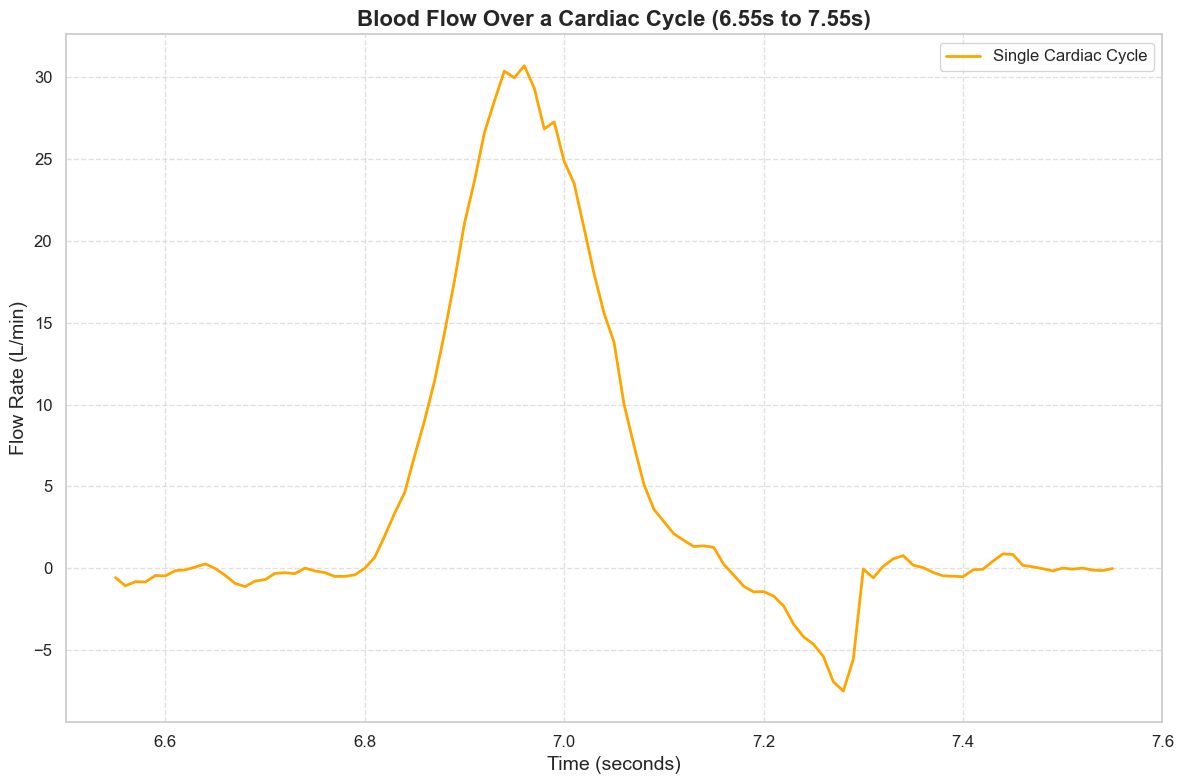

Estimated Stroke Volume: 73.66 mL


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy.integrate import simpson

def plot_data_from_csv(file_path):
    # Set Seaborn style for nicer plots
    sns.set(style="whitegrid")
    
    # Read CSV file using pandas
    data = pd.read_csv(file_path)
    
    # Convert columns to numeric, forcing errors to NaN
    data['Time'] = pd.to_numeric(data['Time'], errors='coerce')
    data['Flow'] = pd.to_numeric(data['Flow'], errors='coerce')
    
    # Drop rows with NaN values
    data = data.dropna()

    # Plot the original data using Matplotlib
    plt.figure(figsize=(12, 8))
    plt.plot(data['Time'], data['Flow'], label='Flow Rate', color='b', linewidth=2)
    
    # Labeling the axes
    plt.xlabel('Time (seconds)', fontsize=14)
    plt.ylabel('Flow Rate (L/min)', fontsize=14)
    plt.title('Flow Rate vs Time', fontsize=16, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Show the original plot
    plt.tight_layout()
    plt.show()

    # Focus on the middle portion of the data to find fully developed peaks and valleys
    middle_start = len(data) // 4
    middle_end = 3 * len(data) // 4
    middle_data = data.iloc[middle_start:middle_end]

    # Find peaks and valleys (negative peaks) in the middle section
    peaks, _ = find_peaks(middle_data['Flow'])
    valleys, _ = find_peaks(-middle_data['Flow'])
    
    # Get the indices that make up the full peaks and valleys
    peak_valley_indices = sorted(peaks.tolist() + valleys.tolist())
    narrowed_data = middle_data.iloc[min(peak_valley_indices):max(peak_valley_indices) + 1]

    # Plot the narrowed data with the same style as the original using Matplotlib
    plt.figure(figsize=(12, 8))
    plt.plot(narrowed_data['Time'], narrowed_data['Flow'], label='Narrowed Flow Rate', color='b', linewidth=2)
    
    # Labeling the axes
    plt.xlabel('Time (seconds)', fontsize=14)
    plt.ylabel('Flow Rate (L/min)', fontsize=14)
    plt.title('Narrowed Flow Rate vs Time (Fully Developed Peaks and Valleys)', fontsize=16, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Show the narrowed plot
    plt.tight_layout()
    plt.show()

    # Plot a specific segment of the data from 6.55 seconds to 7.55 seconds using Matplotlib
    segment_data = data[(data['Time'] >= 6.55) & (data['Time'] <= 7.55)]
    # Print a markdown table with all the x and y values used to make the third graph
    segment_data_table = pd.DataFrame({'Time (seconds)': segment_data['Time'], 'Flow Rate (L/min)': segment_data['Flow']})
    print(segment_data_table.to_markdown(index=False))

    plt.figure(figsize=(12, 8))
    plt.plot(segment_data['Time'], segment_data['Flow'], label='Single Cardiac Cycle', color='orange', linewidth=2)
    
    # Labeling the axes
    plt.xlabel('Time (seconds)', fontsize=14)
    plt.ylabel('Flow Rate (L/min)', fontsize=14)
    plt.title('Blood Flow Over a Cardiac Cycle (6.55s to 7.55s)', fontsize=16, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Show the single cardiac cycle plot
    plt.tight_layout()
    plt.show()

    # Integrate the flow rate over time to calculate the stroke volume for the selected cycle
    segment_data_flow_rate_per_second = segment_data['Flow'] / 60  # Convert L/min to L/s
    stroke_volume = simpson(segment_data_flow_rate_per_second, x=segment_data['Time'])
    stroke_volume_ml = stroke_volume * 1000  # Convert L to mL
    print(f"Estimated Stroke Volume: {stroke_volume_ml:.2f} mL")


plot_data_from_csv('C:/Users/dasar/OneDrive/Desktop/Programing/Heart Valve Sound Analysis/MCL_TGT Flow Analysis/MCL Data to Use/downsampled_MCL_test_run_9 AUG.csv')
